# Optimization Homework 3
Here are just some simple codes for the homework.
I follow [Numerical Recipes in C](https://www.cec.uchile.cl/cinetica/pcordero/MC_libros/NumericalRecipesinC.pdf)
for the overall algorithm.

For the first part of the problem we find the linear approximation of this set of points.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # For comparision

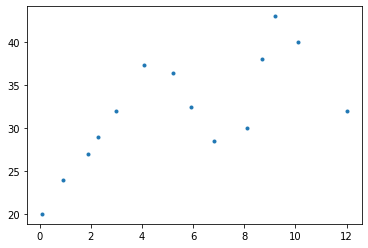

In [3]:
X = np.array([0.1, 0.9, 1.9, 2.3, 3, 4.1, 5.2, 5.9, 6.8, 8.1,
    8.7, 9.2, 10.1, 12])
Y = np.array([20, 24, 27, 29, 32, 37.3, 36.4, 32.4, 28.5,
             30, 38, 43, 40, 32])
plt.plot(X, Y, '.')

# Variance
In the book they assume that each point has its own variance $\sigma_i$, but here we just use the same $\sigma$ for all the points.

The terms of the formula are:
$$ S = \sum_{i=1}^{N}\frac{1}{\sigma^2_i}\quad S_x=\sum_{i=1}^{N}\frac{x_i}{\sigma^2_i} \quad S_y = \sum_{i=1}^{N}\frac{y_i}{\sigma_i^2}$$
$$S_{xx} = \sum_{i=1}^{N}\frac{x_i^2}{\sigma_i^2}\quad S_{xy}=\sum_{i=1}^{N}\frac{x_i y_i}{\sigma_i^2}$$

In [4]:
def optimize(X, Y):
    m, b = 0, 0
    npoints = X.shape[0]
    iterations = 5
    lr = 0.01
    i = 0
    while i < iterations:
        preds = X * m + b
        dm =(-2/npoints)* np.sum(X * (Y - preds))
        db = (-2/npoints)*(np.sum(Y - preds))
        m -= (dm * lr)
        b -= (db * lr)
        
        i += 1
    return m, b

## Plot the Estimate Line
Initial estimate given arbitrary variance.

4.281364105279622 1.2622328750877394
4.281364105279622 1.2622328750877394
4.281364105279622 1.2622328750877394
4.281364105279622 1.2622328750877394
4.281364105279622 1.2622328750877394


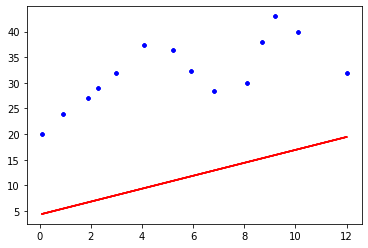

In [5]:
i = 0
while i < 5:
    a, b = optimize(X, Y)
    print(a,b)
    preds = X * b + a
    #var = np.sum(np.power(Y - preds, 2) / (N - M)) 
    #print(var)
    plt.plot(X, Y, 'b.')
    plt.plot(X, preds, 'r')
    i += 1
plt.show()

## `sklearn`'s Linear Regression for comparison

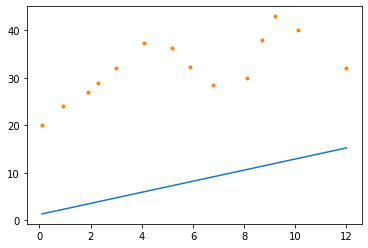

In [6]:
model  = LinearRegression().fit(X.reshape(-1, 1), Y)
plt.plot(X, X * model.coef_ + b)
plt.plot(X, Y, '.')
plt.show()


## Quadratic Regression
The quadratic function is 
$$f(x) = ax^2 + bx + c$$

To find the optimal $(a, b, c)$, we can solve the system of equations
$$ a\sum x_i^4 + b\sum x_i^3 + c\sum x_i^2 = \sum x_i^2 y$$
$$ a\sum x_i^3 + b\sum x_i^2 + c\sum x_i = \sum x_i y$$
$$ a\sum x_i^2 + b\sum x_i + cn_i = \sum y_i$$

We use an online solver to arrive at the optimal values of $a, b, c$.

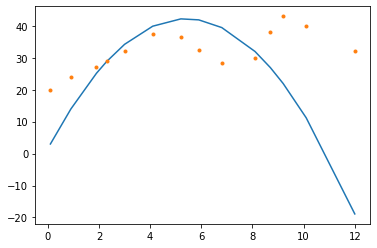

In [7]:
a = -1.4
b = 15.1
c = 1.51
preds = a * np.power(X, 2) + b * X + c

plt.plot(X, preds)
plt.plot(X,Y, '.')
plt.show()

# 2
Using Fletcher-Reeves, and either Newton or Quasi-Newton method, find the best fit linear and quadratic lines numerically.

## Fletcher Reeves


1068.9471428571428
[1.16655857 0.19268571]
[1.86773039 0.31236776]
[2.5157382  0.42794574]
[3.03323108 0.52643439]
[3.41725661 0.60664847]
[3.69308399 0.67201761]
[3.88880676 0.72657027]
[4.02756466 0.77372136]
[4.12676384 0.81621821]
[4.19912389 0.85644637]
[20.  24.  27.  29.  32.  37.3 36.4 32.4 28.5 30.  38.  43.  40.  32. ]


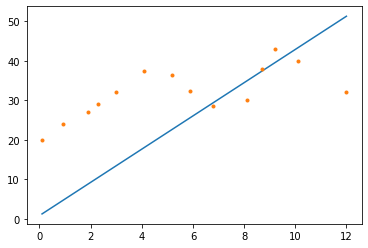

In [37]:
# Quadratic regression error gradient
def error(Y, preds):
    return np.sum(np.power(Y-preds, 2)) / Y.shape[0]

def gradient(x,y, preds, guess):
    a, b, c = guess[0], guess[1], guess[2]
    size = x.shape[0] # Number of points
    dyda = (2/size)*np.sum((y - preds)*(-np.power(x, 2)))
    dydb = (2/size)*np.sum((y - preds))*(-b)
    dydc = (2/size)*np.sum((y-preds))
    return np.array([dyda, dydb, dydc])
    # Add the quadratic derivative
    
def linear_gradient(x, y, preds, guess):
    a, b = guess[0], guess[1]
    size = x.shape[0]
    dydw = np.sum((y - preds)*x) * (2/size)
    dyda = np.sum((y - preds)) * (2/size)
    return np.array([dydw, dyda])

tol = 0.5
#Basically get the first iteration
guess = np.array([0, 0])
preds = X * guess[0] + guess[1]

grad = linear_gradient(X, Y, preds, guess)
S = -grad
lamb = -0.001
print(error(Y, preds))
guess = guess + (lamb*S)
i = 0
# TODO: Still need to find lambda better
while i < 10:
    prev_grad = grad
    grad = linear_gradient(X, Y, preds, guess)
    S = -grad + ((np.power(np.linalg.norm(grad),2))/(np.power(np.linalg.norm(prev_grad),2)))*S
    guess = guess + (lamb * S)
    print(guess)
    preds = guess[0] * X + guess[1]
    i += 1
print(Y)
guess = np.array([4.19912389, 0.85644637])
plt.plot(X, preds)
plt.plot(X, Y, '.')